In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp 
import numpy as np
from scipy import stats

In [2]:
strains = pd.read_csv('/Users/bamudamaris/Library/CloudStorage/GoogleDrive-fufordamaris@gmail.com/My Drive/Data/Datasets/mystrains.tsv', sep = '\t')
strains.head(2)

,Strain Identifier,Strain name,Evolution Experiment?,Parental Strain,Alternative Strain Name,Full Strain Name After Genome Analysis,ENA Accession,Alternative Genome Source,Reference (PMID),Isolation origin,Year,Phenotype,German BSL level,Notes
0,NT12447,B367,0,NaN,KC329,Escherichia coli B367,NaN,Broad institute Antibiotic resistance collection,NaN,Australian magpie Coffs,2001,Commensal strain,1.0,NaN
1,NT12619,S17,0,NaN,NaN,Escherichia coli S17,PRJNA189395,NaN,23516222,Broiler chick with septicemia,2013,Pathogenic strain,2.0,APEC


### Focus only genes with  patterns significantly associated with their expression. 

In [3]:
sig_patterns = [p.split('.tsv')[0] for p in os.listdir('/Users/bamudamaris/ownCloud2/E.coli/GWAS/2023_10_GWAS/panfeed/associations/sig/')]

In [4]:
gene_names = [p.split('.tsv')[0] for p in os.listdir('/Users/bamudamaris/ownCloud2/E.coli/GWAS/2023_10_GWAS/panfeed/associations/sig/')]

# Directory containing the files
directory = '/Users/bamudamaris/ownCloud2/model/ecoli/tx-panfeed_230_rerun/tested_patterns/'

# List to store the contents of each file
all_contents = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.tsv'):
        name = filename.split('.tsv')[0]
        with open(os.path.join(directory, filename), 'r') as file:
            for line in file:
                line = line.strip()  # Remove leading/trailing whitespace
                all_contents.append(f"{name}\t{line}")  # Add the filename as a new column

# Create a DataFrame from the concatenated contents
concatenated_df = pd.DataFrame([line.split('\t') for line in all_contents])

# Rename columns for better understanding
concatenated_df.columns = ['gene_name', 'variant', 'ltr-pvalue', 'beta', 'k-samples']

# Filter the DataFrame to keep only the rows where the gene name starts with any of the gene names from the gene_names DataFrame
filtered_df = concatenated_df[concatenated_df['gene_name'].apply(lambda x: any(x.startswith(gene) for gene in gene_names))]

# Save the filtered DataFrame to a new file
filtered_df.to_csv('filtered_concatenated_patterns.tsv', sep='\t', index=False)


In [3]:
#file generated from the in_silco_validation_panfeed_rerun script. 
f_df = pd.read_csv('filtered_concatenated_patterns.tsv', sep = '\t')
tx_rates = pd.read_csv('tx_rates_panfeed_230.tsv', sep = '\t', index_col = 0)

# Filter tx_rates to only include columns that are in the index of f_df
filtered_columns = tx_rates.columns.intersection(f_df['gene_name'])
tx_rates_filtered = tx_rates[filtered_columns]
tx_rates_filtered.head(2)

,cds-NP_417082.1-613,cds-NP_417082.1-607,cds-NP_414578.2-75,cds-NP_418204.2-940,cds-NP_414880.2-2266,cds-NP_417420.1-2778,cds-NP_418208.1-940,cds-NP_417420.1-2793,cds-NP_417420.1-2787,cds-NP_416773.1-1254,...,cds-NP_418440.1-1100,cds-NP_418554.1-1855,cds-NP_418618.1-1642,cds-NP_418686.1-718,cds-NP_414578.2-87,cds-NP_414578.2-93,cds-NP_414578.2-78,cds-NP_417082.1-622,cds-NP_417082.1-636,cds-YP_588463.1-2320
strain,,,,,,,,,,,,,,,,,,,,,
NT12001,13023.185487,13023.185487,2057.162663,1452.116028,4171.010919,2767.218986,1711.620913,2767.218986,2767.218986,11616.601043,...,1284.565436,2644.365886,2279.413599,2281.612175,2057.162663,2057.162663,2057.162663,13023.185487,13023.185487,2922.76381
NT12002,13023.185487,13023.185487,2057.162663,1452.116028,NaN,2767.218986,1711.620913,2767.218986,2767.218986,11616.601043,...,1284.565436,2644.365886,2279.413599,2281.612175,2057.162663,2057.162663,2057.162663,13023.185487,13023.185487,2922.76381


In [6]:
#correlation between log2Foldchange and predicted transcription rates 
#tx_rates of each divided by that of k12 and then log2 transformed.
df_new = np.log2(tx_rates_filtered/tx_rates_filtered.loc['NT12001'])
df_new.head(4)

,cds-NP_417082.1-613,cds-NP_417082.1-607,cds-NP_414578.2-75,cds-NP_418204.2-940,cds-NP_414880.2-2266,cds-NP_417420.1-2778,cds-NP_418208.1-940,cds-NP_417420.1-2793,cds-NP_417420.1-2787,cds-NP_416773.1-1254,...,cds-NP_418440.1-1100,cds-NP_418554.1-1855,cds-NP_418618.1-1642,cds-NP_418686.1-718,cds-NP_414578.2-87,cds-NP_414578.2-93,cds-NP_414578.2-78,cds-NP_417082.1-622,cds-NP_417082.1-636,cds-YP_588463.1-2320
strain,,,,,,,,,,,,,,,,,,,,,
NT12001,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
NT12002,0.000000,0.000000,0.0,0.000000,NaN,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
NT12004,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
NT12012,-2.117602,-2.117602,0.0,0.318827,-1.464291,0.000012,0.0,0.000012,0.000012,0.0,...,0.152345,0.0,-0.960852,0.476826,0.0,0.0,0.0,-2.117602,-2.117602,NaN


In [6]:
#df_new.to_csv('predicted_rates_sig_associations.tsv', sep ='\t')

In [ ]:
deg = pd.read_csv('/Users/bamudamaris/Library/CloudStorage/GoogleDrive-fufordamaris@gmail.com/My Drive/Data/Datasets/deseqoutput_protein-ids.tsv', sep = '\t', index_col = 0).T
deg.head(3)

gene-id,cds-NP_414543.1,cds-NP_414544.1,cds-NP_414545.1,cds-NP_414546.1,cds-NP_414547.1,cds-NP_414548.1,cds-NP_414549.1,cds-NP_414550.1,cds-NP_414551.1,cds-NP_414552.1,...,cds-NP_418811.2,cds-NP_418812.1,cds-NP_418813.1,cds-NP_418814.1,cds-NP_418815.1,cds-NP_418816.1,cds-NP_418817.1,cds-NP_418818.1,cds-NP_418819.1,cds-NP_418820.1
NT12189,-1.396155,-1.086905,-1.036221,-1.127845,-0.170443,0.154180,0.743706,0.231421,-1.702605,2.666265,...,-0.026376,0.058862,0.081481,0.324293,0.111350,0.357424,3.099915,0.239958,0.529843,0.288563
NT12177,-2.021794,-1.487570,-1.481607,-0.445211,0.236060,-0.659636,-0.199121,0.661353,-0.481898,0.949621,...,-0.682059,-0.349514,-0.762992,-0.336101,-0.088115,0.407631,0.086031,0.108566,0.537271,0.573327
NT12130,-0.956499,-0.586719,-0.499014,-1.345601,0.244311,-0.234788,0.440232,0.620264,-1.095199,0.796310,...,0.574220,0.061330,-0.116296,0.051911,0.330066,0.430785,-0.603411,0.244223,-0.138190,0.107360


In [8]:
import warnings 

pearson = {}
spearman = {}
regress = {}

def safe_correlation(x, y):
    if len(set(x)) == 1 or len(set(y)) == 1:
        return 0, 1  # Return correlation of 0 with p-value of 1 for constant input
    return sp.stats.pearsonr(x, y)

def safe_regression(x, y):
    if len(set(x)) == 1 or len(set(y)) == 1:
        return [0, 0, 0, 1, 0]  # Return dummy values for constant input
    return stats.linregress(x, y)

for var in df_new.columns:
    g_var = 'cds-' + var.split('-')[1]
    var_df = f_df[f_df['gene_name'] == var]
    samples = set(var_df['k-samples'].str.cat(sep=',').split(','))
    
    if g_var in deg.columns:
        # Merge predicted transcription rate and actual expression
        d = pd.merge(df_new[var], deg[g_var], left_index=True, right_index=True, how='inner').dropna()
        
        # Filter to include only strains with the variant
        d_variant = d[d.index.isin(samples)]
        
        if d_variant.empty:
            print(f"No data points with variant for {var}. Skipping.")
            continue
        
        d_variant.columns = ['Predicted transcription rate', 'log2foldchange']
        
        # Calculate correlations and regression
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            p, pp = safe_correlation(d_variant['Predicted transcription rate'], d_variant['log2foldchange'])
            s, ps = safe_correlation(sp.stats.rankdata(d_variant['Predicted transcription rate']), 
                                     sp.stats.rankdata(d_variant['log2foldchange']))
            slope, intercept, r_value, p_value, std_err = safe_regression(d_variant['Predicted transcription rate'], 
                                                                          d_variant['log2foldchange'])
        
        pearson[var] = round(p, 2), pp
        spearman[var] = round(s, 2), ps
        regress[var] = [round(r_value, 2), p_value]
        
        # Create scatter plot
        plt.figure(figsize=(5, 4))
        plt.rcParams.update({'font.size': 14})
        sns.scatterplot(data=d_variant, x='Predicted transcription rate', y='log2foldchange')
        
        if len(set(d_variant['Predicted transcription rate'])) > 1 and len(set(d_variant['log2foldchange'])) > 1:
            sns.regplot(data=d_variant, x='Predicted transcription rate', y='log2foldchange', 
                        scatter=False, 
                        label=f'r={p:.2f}')
        else:
            plt.plot([], [], color='red', label='Constant input')
        
        plt.ylabel( '$\log_2$(FC)\n(Actual Expression)')
        plt.xlabel('Predicted transcription rate\nrelative to $\it{E. coli}$ K-12')
        plt.title(f"{g_var}")
        plt.tight_layout()
        plt.legend()
        plt.savefig(f'corr-plots_var_present/{var}_variant_only.svg', dpi=300)
        plt.close()

print("Analysis complete. Check the 'corr-plots' directory for the generated plots.")

Analysis complete. Check the 'corr-plots' directory for the generated plots.


Comparing predicted expression rates of strains with the variants vs those without the variants

In [8]:

pearson = {}
spearman = {}
regress = {}

for var in df_new.columns:
    g_var = 'cds-' + var.split('-')[1]
    var_df = f_df[f_df['gene_name'] == var]
    samples = set(var_df['k-samples'].str.cat(sep=',').split(','))
    
    if g_var in deg.columns:
        # Merge predicted transcription rate and actual expression
        d = pd.merge(df_new[var], deg[g_var], left_index=True, right_index=True, how='inner').dropna()
        
        # Add a column to indicate variant presence
        d['variant_present'] = d.index.isin(samples).astype(int)
        d.columns = ['Predicted transcription rate', 'log2foldchange', 'variant_present']
        
        # Separate dataframes for variant present and absent
        d_variant = d[d['variant_present'] == 1]
        d_no_variant = d[d['variant_present'] == 0]
        
        # Calculate correlations and regression for both cases
        for case, data in [("Variant", d_variant), ("No Variant", d_no_variant)]:
            if not data.empty:
                p, pp = sp.stats.pearsonr(data['Predicted transcription rate'], data['log2foldchange'])
                s, ps = sp.stats.spearmanr(data['Predicted transcription rate'], data['log2foldchange'])
                slope, intercept, r_value, p_value, std_err = stats.linregress(data['Predicted transcription rate'], data['log2foldchange'])
                
                pearson[f"{var}_{case}"] = round(p, 2), pp
                spearman[f"{var}_{case}"] = round(s, 2), ps
                regress[f"{var}_{case}"] = [round(r_value, 2), p_value]
        
        # Create scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=d, x='Predicted transcription rate', y='log2foldchange', 
                        hue='variant_present', palette={0: 'blue', 1: 'red'}, alpha=0.7)
        
        # Add regression lines for both cases
        for case, data, color in [("Variant", d_variant, 'red'), ("No Variant", d_no_variant, 'blue')]:
            if not data.empty:
                sns.regplot(data=data, x='Predicted transcription rate', y='log2foldchange', 
                            scatter=False, color=color, label=f'{case} (r={pearson[f"{var}_{case}"][0]:.2f}, p={pearson[f"{var}_{case}"][1]:.3f})')
        
        plt.ylabel('log2foldchange (Actual Expression)')
        plt.xlabel('Predicted transcription rate')
        plt.title(f"{g_var}")
        plt.legend(title='Variant present')
        plt.tight_layout()
        plt.savefig(f'corr-plots/{var}_comparison.svg', dpi=300)
        plt.close()

print("Analysis complete. Check the 'corr-plots' directory for the generated plots.")

/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/scipy/s

Analysis complete. Check the 'corr-plots' directory for the generated plots.


In [9]:
#save computed correlation values to dataframe for downstream analysis
df_p = pd.DataFrame(pearson).T.rename(columns = {0: 'pearson', 1: 'pearson(p-value)'})
df_sp = pd.DataFrame(spearman).T.rename(columns = {0:'spearman', 1:'spearman(p-value)'})
linregress = pd.DataFrame(regress).T.rename(columns = {0: 'r_value', 1: 'regress(p-value)'})    

In [11]:
outcomes = {}
for i in tx_rates.columns:
    name = i + '.tsv'
    a = pd.read_csv('/Users/bamudamaris/ownCloud2/model/ecoli/validation_2024/tested_patterns/' + name,  sep = '\t', index_col = 0, names = ['pattern', 'lrt-pvalue', 'beta', 'k-samples'])
    a['assigned'] = a['lrt-pvalue'].apply(lambda x: 1 if x <= 6.95E-06 else 0)
    outcomes[i] = a['assigned'].values.tolist()
outcome = pd.DataFrame(outcomes).T.rename(columns = {0: 'association'}) 
outcome

,association
cds-NP_418030.1-793,0
cds-NP_417082.1-613,0
cds-NP_415117.2-501,0
cds-NP_416726.1-2615,0
cds-NP_417082.1-607,0
...,...
cds-NP_415592.1-4200,0
cds-NP_415129.1-35,0
cds-NP_415592.1-4214,0
cds-NP_416770.1-9,0


In [3]:
#combine dataframes
# prediction = pd.concat([df_p, df_sp, linregress, outcome], axis = 1).dropna()
# prediction['association'] = prediction['association'].astype(int)
prediction = pd.read_csv('/Users/bamudamaris/ownCloud2/model/ecoli/tx-panfeed_230_rerun/asso-correlation-panfeed230-sig.tsv', sep = '\t', index_col = 0)
prediction

,pearson,pearson(p-value),spearman,spearman(p-value),r_value,regress(p-value),association,adjusted_p_values
cds-NP_414578.2-75,-0.01,8.981294e-01,0.02,8.151193e-01,-0.01,8.981294e-01,1,9.478283e-01
cds-NP_418204.2-940,-0.04,6.972647e-01,-0.04,6.448540e-01,-0.04,6.972647e-01,1,8.237597e-01
cds-NP_414880.2-2266,0.07,5.270828e-01,0.01,9.302139e-01,0.07,5.270828e-01,1,6.966887e-01
cds-NP_418208.1-940,-0.07,4.455788e-01,-0.06,5.351611e-01,-0.07,4.455788e-01,1,6.387368e-01
cds-NP_416773.1-1254,0.16,1.462598e-01,0.21,5.638126e-02,0.16,1.462598e-01,1,3.137891e-01
...,...,...,...,...,...,...,...,...
cds-NP_418085.2-2294,0.33,4.280707e-02,0.31,5.926000e-02,0.33,4.280707e-02,1,1.465319e-01
cds-NP_417610.1-1604,0.69,9.906809e-18,0.74,4.008327e-21,0.69,9.906809e-18,1,1.889370e-16
cds-NP_418554.1-1855,-0.37,6.530199e-05,-0.21,2.683375e-02,-0.37,6.530199e-05,1,4.712333e-04
cds-NP_418686.1-718,-0.04,7.416543e-01,-0.04,7.280097e-01,-0.04,7.416543e-01,1,8.488176e-01


Focus on significantly associated variants only 

In [4]:
#perform multiple test corrections

import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

sig = prediction[prediction['association'] == 1]


# Perform multiple test correlation using Benjamini-Hochberg (FDR) correction
sig['adjusted_p_values'] = multipletests(sig['pearson(p-value)'], method='fdr_bh')[1]

#sig.to_csv('asso-correlation-panfeed230-sig.tsv', sep = '\t')

sig


,pearson,pearson(p-value),spearman,spearman(p-value),r_value,regress(p-value),association,adjusted_p_values
cds-NP_414578.2-75,-0.01,8.981294e-01,0.02,8.151193e-01,-0.01,8.981294e-01,1,9.478283e-01
cds-NP_418204.2-940,-0.04,6.972647e-01,-0.04,6.448540e-01,-0.04,6.972647e-01,1,8.237597e-01
cds-NP_414880.2-2266,0.07,5.270828e-01,0.01,9.302139e-01,0.07,5.270828e-01,1,6.966887e-01
cds-NP_418208.1-940,-0.07,4.455788e-01,-0.06,5.351611e-01,-0.07,4.455788e-01,1,6.387368e-01
cds-NP_416773.1-1254,0.16,1.462598e-01,0.21,5.638126e-02,0.16,1.462598e-01,1,3.137891e-01
...,...,...,...,...,...,...,...,...
cds-NP_418085.2-2294,0.33,4.280707e-02,0.31,5.926000e-02,0.33,4.280707e-02,1,1.465319e-01
cds-NP_417610.1-1604,0.69,9.906809e-18,0.74,4.008327e-21,0.69,9.906809e-18,1,1.889370e-16
cds-NP_418554.1-1855,-0.37,6.530199e-05,-0.21,2.683375e-02,-0.37,6.530199e-05,1,4.712333e-04
cds-NP_418686.1-718,-0.04,7.416543e-01,-0.04,7.280097e-01,-0.04,7.416543e-01,1,8.488176e-01


In [6]:
thresholds = [0.001,0.002, 0.003, 0.004, 0.005, 0.0001, 0.01, 0.05]  

total_var = len(sig)

for threshold in thresholds:
    significant_correlations = sig[(sig['pearson'] > 0) & (sig['adjusted_p_values'] <= threshold)]
    num_significant = len(significant_correlations)
    percentage = (num_significant / total_var) * 100
    print(f"For threshold {threshold}, number of significant correlations is: {num_significant} ({percentage:.2f}%)")


For threshold 0.001, number of significant correlations is: 22 (8.24%)
For threshold 0.002, number of significant correlations is: 22 (8.24%)
For threshold 0.003, number of significant correlations is: 25 (9.36%)
For threshold 0.004, number of significant correlations is: 25 (9.36%)
For threshold 0.005, number of significant correlations is: 25 (9.36%)
For threshold 0.0001, number of significant correlations is: 21 (7.87%)
For threshold 0.01, number of significant correlations is: 26 (9.74%)
For threshold 0.05, number of significant correlations is: 34 (12.73%)


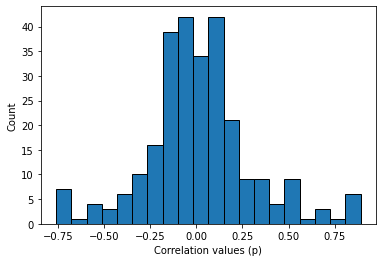

In [7]:
sig_filtered = sig[sig['adjusted_p_values'] < 0.05]
plt.hist(sig['pearson'], bins=20, edgecolor='black')
plt.xlabel('Correlation values (p)')
plt.ylabel('Count')
plt.rcParams.update({'font.size': 12})
#plt.title('Associated variants')
#plt.savefig('sig_correlation.svg', dpi = 300)
plt.show()

In [8]:
sig['gene'] = ['cds-' + g.split('-')[1] for g in sig.index]
sig

,pearson,pearson(p-value),spearman,spearman(p-value),r_value,regress(p-value),association,adjusted_p_values,gene
cds-NP_414578.2-75,-0.01,8.981294e-01,0.02,8.151193e-01,-0.01,8.981294e-01,1,9.478283e-01,cds-NP_414578.2
cds-NP_418204.2-940,-0.04,6.972647e-01,-0.04,6.448540e-01,-0.04,6.972647e-01,1,8.237597e-01,cds-NP_418204.2
cds-NP_414880.2-2266,0.07,5.270828e-01,0.01,9.302139e-01,0.07,5.270828e-01,1,6.966887e-01,cds-NP_414880.2
cds-NP_418208.1-940,-0.07,4.455788e-01,-0.06,5.351611e-01,-0.07,4.455788e-01,1,6.387368e-01,cds-NP_418208.1
cds-NP_416773.1-1254,0.16,1.462598e-01,0.21,5.638126e-02,0.16,1.462598e-01,1,3.137891e-01,cds-NP_416773.1
...,...,...,...,...,...,...,...,...,...
cds-NP_418085.2-2294,0.33,4.280707e-02,0.31,5.926000e-02,0.33,4.280707e-02,1,1.465319e-01,cds-NP_418085.2
cds-NP_417610.1-1604,0.69,9.906809e-18,0.74,4.008327e-21,0.69,9.906809e-18,1,1.889370e-16,cds-NP_417610.1
cds-NP_418554.1-1855,-0.37,6.530199e-05,-0.21,2.683375e-02,-0.37,6.530199e-05,1,4.712333e-04,cds-NP_418554.1
cds-NP_418686.1-718,-0.04,7.416543e-01,-0.04,7.280097e-01,-0.04,7.416543e-01,1,8.488176e-01,cds-NP_418686.1


In [9]:
data = sig.copy()
data.head(3)

,pearson,pearson(p-value),spearman,spearman(p-value),r_value,regress(p-value),association,adjusted_p_values,gene
cds-NP_414578.2-75,-0.01,0.898129,0.02,0.815119,-0.01,0.898129,1,0.947828,cds-NP_414578.2
cds-NP_418204.2-940,-0.04,0.697265,-0.04,0.644854,-0.04,0.697265,1,0.823760,cds-NP_418204.2
cds-NP_414880.2-2266,0.07,0.527083,0.01,0.930214,0.07,0.527083,1,0.696689,cds-NP_414880.2


In [6]:
data = sig.copy()

In [7]:
# Total number of correlations
count = data.shape[0]

# No correlation
no_corr_df = data[data['pearson'] == 0.0]
no_correlation = no_corr_df.shape[0]

# Weak positive (0 < r ≤ 0.2)
weak_pos_df = data[(data['pearson'] > 0.0) & (data['pearson'] <= 0.2)]
weak_pos = weak_pos_df.shape[0]

# Weak negative (-0.2 ≤ r < 0)
weak_neg_df = data[(data['pearson'] < 0.0) & (data['pearson'] >= -0.2)]
weak_neg = weak_neg_df.shape[0]

# Moderate positive (0.2 < r < 0.8)
moderate_pos_df = data[(data['pearson'] > 0.2) & (data['pearson'] < 0.8)]
moderate_pos = moderate_pos_df.shape[0]

# Moderate negative (-0.8 < r < -0.2)
moderate_neg_df = data[(data['pearson'] < -0.2) & (data['pearson'] > -0.8)]
moderate_neg = moderate_neg_df.shape[0]

# Strong positive (r ≥ 0.8)
strong_pos_df = data[data['pearson'] >= 0.8]
strong_pos = strong_pos_df.shape[0]

# Strong negative (r ≤ -0.8)
strong_neg_df = data[data['pearson'] <= -0.8]
strong_neg = strong_neg_df.shape[0]

# Print summary with direction
print(f"No correlation (r = 0.0): {no_correlation} ({no_correlation/count*100:.2f}%)")
print(f"Weak positive (0 < r ≤ 0.2): {weak_pos} ({weak_pos/count*100:.2f}%)")
print(f"Weak negative (-0.2 ≤ r < 0): {weak_neg} ({weak_neg/count*100:.2f}%)")
print(f"Moderate positive (0.2 < r < 0.8): {moderate_pos} ({moderate_pos/count*100:.2f}%)")
print(f"Moderate negative (-0.8 < r < -0.2): {moderate_neg} ({moderate_neg/count*100:.2f}%)")
print(f"Strong positive (r ≥ 0.8): {strong_pos} ({strong_pos/count*100:.2f}%)")
print(f"Strong negative (r ≤ -0.8): {strong_neg} ({strong_neg/count*100:.2f}%)")

# Supervisor’s key interest: total counts >0.2 and < -0.2
pos_corr = data[data['pearson'] > 0.2].shape[0]
neg_corr = data[data['pearson'] < -0.2].shape[0]

print(f"\nCorrelations > 0.2: {pos_corr} ({pos_corr/count*100:.2f}%)")
print(f"Correlations < -0.2: {neg_corr} ({neg_corr/count*100:.2f}%)")


No correlation (r = 0.0): 5 (1.87%)
Weak positive (0 < r ≤ 0.2): 83 (31.09%)
Weak negative (-0.2 ≤ r < 0): 92 (34.46%)
Moderate positive (0.2 < r < 0.8): 39 (14.61%)
Moderate negative (-0.8 < r < -0.2): 41 (15.36%)
Strong positive (r ≥ 0.8): 7 (2.62%)
Strong negative (r ≤ -0.8): 0 (0.00%)

Correlations > 0.2: 46 (17.23%)
Correlations < -0.2: 41 (15.36%)


In [10]:
# Effect size classifications
count = data.shape[0]

# Effect size classifications with proper grouping
no_correlation = data[data['pearson'] == 0.0].shape[0]
weak = data[(data['pearson'] > 0.0) & (data['pearson'] <= 0.2) | (data['pearson'] < 0.0) & (data['pearson'] >= -0.2)].shape[0]
moderate = data[(data['pearson'] > 0.2) & (data['pearson'] < 0.8) | (data['pearson'] < -0.2) & (data['pearson'] >= -0.8)].shape[0]
strong = data[(data['pearson'] >= 0.8) | (data['pearson'] <= -0.8)].shape[0]

# Print out the classification results and proportions
print(f"No correlation (r = 0.0): {no_correlation} ({no_correlation/count*100:.2f}%)")
print(f"Weak effect (0 < r ≤ 0.2): {weak} ({weak/count*100:.2f}%)")
print(f"Moderate effect (0.2 > r < 0.8): {moderate} ({moderate/count*100:.2f}%)")
print(f"Strong effect (r ≥ 0.8): {strong} ({strong/count*100:.2f}%)")

No correlation (r = 0.0): 5 (1.87%)
Weak effect (0 < r ≤ 0.2): 175 (65.54%)
Moderate effect (0.2 < r < 0.8): 80 (29.96%)
Strong effect (r ≥ 0.8): 7 (2.62%)


In [11]:
data_filtered = data[data['adjusted_p_values'] < 0.0001]
data_filtered

,pearson,pearson(p-value),spearman,spearman(p-value),r_value,regress(p-value),association,adjusted_p_values,gene
cds-NP_418132.1-345,-0.73,3.224524e-20,-0.72,9.821030e-20,-0.73,3.224524e-20,1,6.622676e-19,cds-NP_418132.1
cds-NP_418132.1-347,-0.73,3.224524e-20,-0.72,9.821030e-20,-0.73,3.224524e-20,1,6.622676e-19,cds-NP_418132.1
cds-NP_417082.1-201,0.82,7.630992e-29,0.37,3.777200e-05,0.82,7.630992e-29,1,6.460178e-27,cds-NP_417082.1
cds-NP_418132.1-343,-0.73,3.224524e-20,-0.72,9.821030e-20,-0.73,3.224524e-20,1,6.622676e-19,cds-NP_418132.1
cds-NP_418089.1-1541,0.81,1.451725e-28,0.72,4.044563e-20,0.81,1.451725e-28,1,6.460178e-27,cds-NP_418089.1
cds-NP_414752.1-2591,0.51,2.604887e-07,0.58,1.193219e-09,0.51,2.604887e-07,1,2.575944e-06,cds-NP_414752.1
cds-NP_418089.1-1527,0.81,1.451725e-28,0.72,4.044563e-20,0.81,1.451725e-28,1,6.460178e-27,cds-NP_418089.1
cds-NP_418089.1-1533,0.81,1.451725e-28,0.72,4.044563e-20,0.81,1.451725e-28,1,6.460178e-27,cds-NP_418089.1
cds-YP_009518818.1-1883,-0.76,3.642711e-23,-0.53,1.033072e-09,-0.76,3.642711e-23,1,9.726039e-22,cds-YP_009518818.1
cds-YP_009518818.1-1897,-0.76,3.642711e-23,-0.53,1.033072e-09,-0.76,3.642711e-23,1,9.726039e-22,cds-YP_009518818.1


In [22]:
non_sig = prediction[prediction['association'] == 0]


# Perform multiple test correlation using Benjamini-Hochberg (FDR) correction
non_sig['adjusted_p_values'] = multipletests(non_sig['pearson(p-value)'], method='fdr_bh')[1]
non_sig.to_csv('non-associated-correlation-panfeed230.tsv', sep = '\t')
non_sig

ZeroDivisionError: float division by zero

In [16]:
thresholds = [0.001,0.002, 0.003, 0.004, 0.005, 0.0001]  

total_var = len(non_sig)

for threshold in thresholds:
    significant_correlations = non_sig[(non_sig['pearson'] > 0) & (non_sig['adjusted_p_values'] <= threshold)]
    num_significant = len(significant_correlations)
    percentage = (num_significant / total_var) * 100
    print(f"For threshold {threshold}, number of significant correlations is: {num_significant} ({percentage:.2f}%)")


For threshold 0.001, number of significant correlations is: 426 (9.31%)
For threshold 0.002, number of significant correlations is: 451 (9.85%)
For threshold 0.003, number of significant correlations is: 452 (9.88%)
For threshold 0.004, number of significant correlations is: 464 (10.14%)
For threshold 0.005, number of significant correlations is: 464 (10.14%)
For threshold 0.0001, number of significant correlations is: 370 (8.08%)


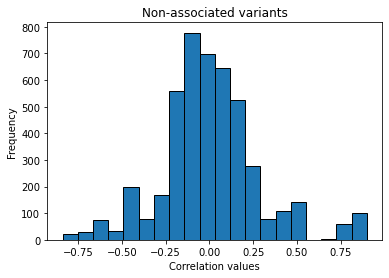

In [26]:
plt.hist(non_sig['pearson'], bins=20, edgecolor='black')
plt.xlabel('Correlation values')
plt.ylabel('Frequency')
plt.title('Non-associated variants')
plt.savefig('non-sig_correlation.png', dpi = 300)
plt.show()